# Class 3

- Datatypes
- Applying functions
- Visual and statistical pre-analysis (EDA)
- Data anomaly detection and treatment
- Linear correlations

In [1]:
import pandas as pd
import numpy as np

# Data Types

There are three main categories of datatypes:

## Numerical

- integer
- float
- complex

## Categorical

- category
- boolean

## Object

- object
- string

The datetypes in each column of a Dataframe are accessible using the `dtypes` attribute.

In [13]:
# Example dateset
import seaborn as sns
tips = sns.load_dataset("tips")

In [292]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [291]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [294]:
# convert datatypes using the astype method
tips['sex_str'] = tips['sex'].astype(str)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [296]:
tips['tip_str'] = tips['tip'].astype(str)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
tip_str         object
dtype: object

In [297]:
tips.head()

total_bill   tip     sex smoker  day    time  size sex_str tip_str
0       16.99  1.01  Female     No  Sun  Dinner     2  Female    1.01
1       10.34  1.66    Male     No  Sun  Dinner     3    Male    1.66
2       21.01  3.50    Male     No  Sun  Dinner     3    Male     3.5
3       23.68  3.31    Male     No  Sun  Dinner     2    Male    3.31
4       24.59  3.61  Female     No  Sun  Dinner     4  Female    3.61

In [298]:
tips['tip_str_num'] = tips['tip_str'].astype(float)
tips.dtypes

total_bill      float64
tip             float64
sex            category
smoker         category
day            category
time           category
size              int64
sex_str          object
tip_str          object
tip_str_num     float64
dtype: object

To convert a string containing numbers back to a numeric value you can also use the `to_numeric()` method.
This is especialy useful when there are values that can't be parsed

In [302]:
# modify the example

tips.loc[[1,2,3,5], 'total_bill'] = 'not a number'
tips['total_bill'] = tips['total_bill'].astype(str)
tips.head()

total_bill   tip     sex smoker  day    time  size sex_str tip_str  \
0         16.99  1.01  Female     No  Sun  Dinner     2  Female    1.01   
1  not a number  1.66    Male     No  Sun  Dinner     3    Male    1.66   
2  not a number  3.50    Male     No  Sun  Dinner     3    Male     3.5   
3  not a number  3.31    Male     No  Sun  Dinner     2    Male    3.31   
4         24.59  3.61  Female     No  Sun  Dinner     4  Female    3.61   

   tip_str_num  
0         1.01  
1         1.66  
2         3.50  
3         3.31  
4         3.61

In [301]:
tips.dtypes

total_bill       object
tip             float64
sex            category
smoker         category
day            category
time           category
size              int64
sex_str          object
tip_str          object
tip_str_num     float64
dtype: object

In [303]:
tips['total_bill'].astype(float)

ValueError: could not convert string to float: 'not a number'

In [304]:
# errors='ignore' will just leave the input when a value can't be parsed
tips['total_bill_num'] = pd.to_numeric(
    tips['total_bill'],
    errors='ignore'
)
tips.head()

total_bill   tip     sex smoker  day    time  size sex_str tip_str  \
0         16.99  1.01  Female     No  Sun  Dinner     2  Female    1.01   
1  not a number  1.66    Male     No  Sun  Dinner     3    Male    1.66   
2  not a number  3.50    Male     No  Sun  Dinner     3    Male     3.5   
3  not a number  3.31    Male     No  Sun  Dinner     2    Male    3.31   
4         24.59  3.61  Female     No  Sun  Dinner     4  Female    3.61   

   tip_str_num total_bill_num  
0         1.01          16.99  
1         1.66   not a number  
2         3.50   not a number  
3         3.31   not a number  
4         3.61          24.59

In [305]:
# errors='coerce' will set invalid values to NaN
tips['total_bill_num2'] = pd.to_numeric(
    tips['total_bill'],
    errors='coerce'
)
tips.head()

total_bill   tip     sex smoker  day    time  size sex_str tip_str  \
0         16.99  1.01  Female     No  Sun  Dinner     2  Female    1.01   
1  not a number  1.66    Male     No  Sun  Dinner     3    Male    1.66   
2  not a number  3.50    Male     No  Sun  Dinner     3    Male     3.5   
3  not a number  3.31    Male     No  Sun  Dinner     2    Male    3.31   
4         24.59  3.61  Female     No  Sun  Dinner     4  Female    3.61   

   tip_str_num total_bill_num  total_bill_num2  
0         1.01          16.99            16.99  
1         1.66   not a number              NaN  
2         3.50   not a number              NaN  
3         3.31   not a number              NaN  
4         3.61          24.59            24.59

## Display datatypes

The `info()` method provides much more information on a Dataframe or Series than only the datatypes.

In [12]:
tips.info()

NameError: name 'tips' is not defined

In [4]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Applying functions

Applying functions to a Series or Dataframe is an essential task especially when cleaning data.

## Apply on a Series

In [274]:
# Create a sample Series
SampleSeries2 = pd.Series([15, 13, 11, 9],
                         name = 'ages',
                         index = ['Layla', 'Mia', 'Laurin', 'Lea'])

# Create a sample function
def age_in_days(x):
    ''' Calculates the age in days
    'x' the age in years
    '''
    return int(x*365.24)

# Apply the sample function to the sample Series
days = SampleSeries2.apply(age_in_days)
days

Layla     5478
Mia       4748
Laurin    4017
Lea       3287
Name: ages, dtype: int64

## Apply on a Dataframe

When applying functions on a Dataframe it is important to take into consideration that there are two dimensions to a Dataframe: columns and rows.

In [ ]:
# Create a sample Dataframe from the weather dataset
weather_td = (
    pd.read_csv('weather.csv')
    .melt(
        id_vars=['id', 'year', 'month', 'element'],
        var_name='day',
        value_name='temp')
    .pivot_table(
        index=['id', 'year', 'month', 'day'],
        columns='element',
        values='temp')
    .reset_index()[['tmax', 'tmin']]
)
weather_td.head()

element  tmax  tmin
0        27.8  14.5
1        29.7  13.4
2        27.3  14.4
3        29.9  10.7
4        24.1  14.4

In [279]:
# Create a sample function
def average_int(x):
    ''' Calculates the average and converts it to integer
    'x' the data to take the average from
    '''
    import numpy as np
    return int(np.mean(x))

In [285]:
# using axis=0 or axis='index' for column-wise operation
weather_td.apply(average_int, axis='index')

element
tmax    29
tmin    14
dtype: int64

In [286]:
# using axis=1 or axis='columns' for row-wise operation
weather_td.apply(average_int, axis=1).head()

0    21
1    21
2    20
3    20
4    19
dtype: int64

## Lambda functions

Lambda functions are functions that are shorter way to write very short functions that are only used in one place.

The function doesn't need to be defined using the `def` keyword but can be written directly where it is used using the `lambda` keyword.

In [288]:
# recreating the average_int example from above using a lambda function
weather_td.apply(lambda x: int(np.mean(x)), axis='index')

element
tmax    29
tmin    14
dtype: int64

# Exploratory data analysis (EDA)

Every time after loading a new dataset it is very important to analyse the dataset before using it.

The following steps should be taken:

1. Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe

2. Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns

3. Feature Understanding
- Univariate Analysis

4. Feature Relationships
- Multivariate Analysis

## Analysing the structure of a dataset

The main things to look at here are:
- the size of the dataset (number of columns and rows)
- datatypes
- first impression on the contents

Keep in mind that for some very large datasets this analysis has to be done before even loading the dataset.

As example dataset we are using a wine quality dataset from UCI https://archive.ics.uci.edu/ml/datasets/wine+quality.

In [10]:
# reading the dataset
red = pd.read_csv('winequality-red.csv', sep=';')

Keep in mind that for very large files it sometimes is needed to read in a subset of the file contents for this analysis.

For .csv files in Pandas this can be acceived by using the `skiprows` and `nrows` parameters of the `read_csv()` function.

In [8]:
# reading a subset of the dataset (rows 6 to 26)
white = pd.read_csv('winequality-white.csv', sep=';', skiprows=5, nrows=20)

In [3]:
red.shape

(1599, 12)

There are 12 columns and 1599 rows of data.

In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset contains only numeric values. And has no missing values.

In [5]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
red.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

## Statistical Analysis

The first thing to look at is general statistics about the date like: mean, min, max and standard deviation

The easiest way to get these is to use the `describe()` method.

To also get information about non-nummerical columns in a Dataframe use it with the parameter `include=all`

In [11]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [16]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [17]:
tips.describe(include='all')

total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000

The `describe()` method shows the number of unique values for the categorical columns. Let's look if they are equally distributed.

In [23]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

The dataset contains nearly double the number of datapoints for males.

In [24]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [25]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [26]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

The data is not very equally distributed among all categories. This makes the dataset unbalanced which needs to be kept in mind when drawing conclusions from the data or building models based on the data.

While this already gives a first impression of the data there are more statistical parameters to look at like.

### Kurtosis

The Kurtosis describes an aspect of how the distribution of the data differs compared to a normal distribution in its "tailedness". So if the distribution has rather more values at the extreme ends or less.

Using Fischer's definition of the Kurtosis the normal distribution has a Kurtosis of 0.

- Negative Kurtosis values indicate fewer and/or less extreme outliers than the normal distribution. This is called platykurtic.

- Positive Kurtosis values indicate more outliers that the normal distribution. This is called leptokurtic.

In Pandas you can use the `kurt()` method on a Dataframe, column or Series.

In [19]:
red.kurt()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

### Skewness

Another important measure is the Skewness of the distribution underlying the data.

It describes the asymetry of the distribution. The normal distribution has a skew of 0.

- negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed. A left-skewed distribution usually appears as a right-leaning curve.

- positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed. A right-skewed distribution usually appears as a left-leaning curve.

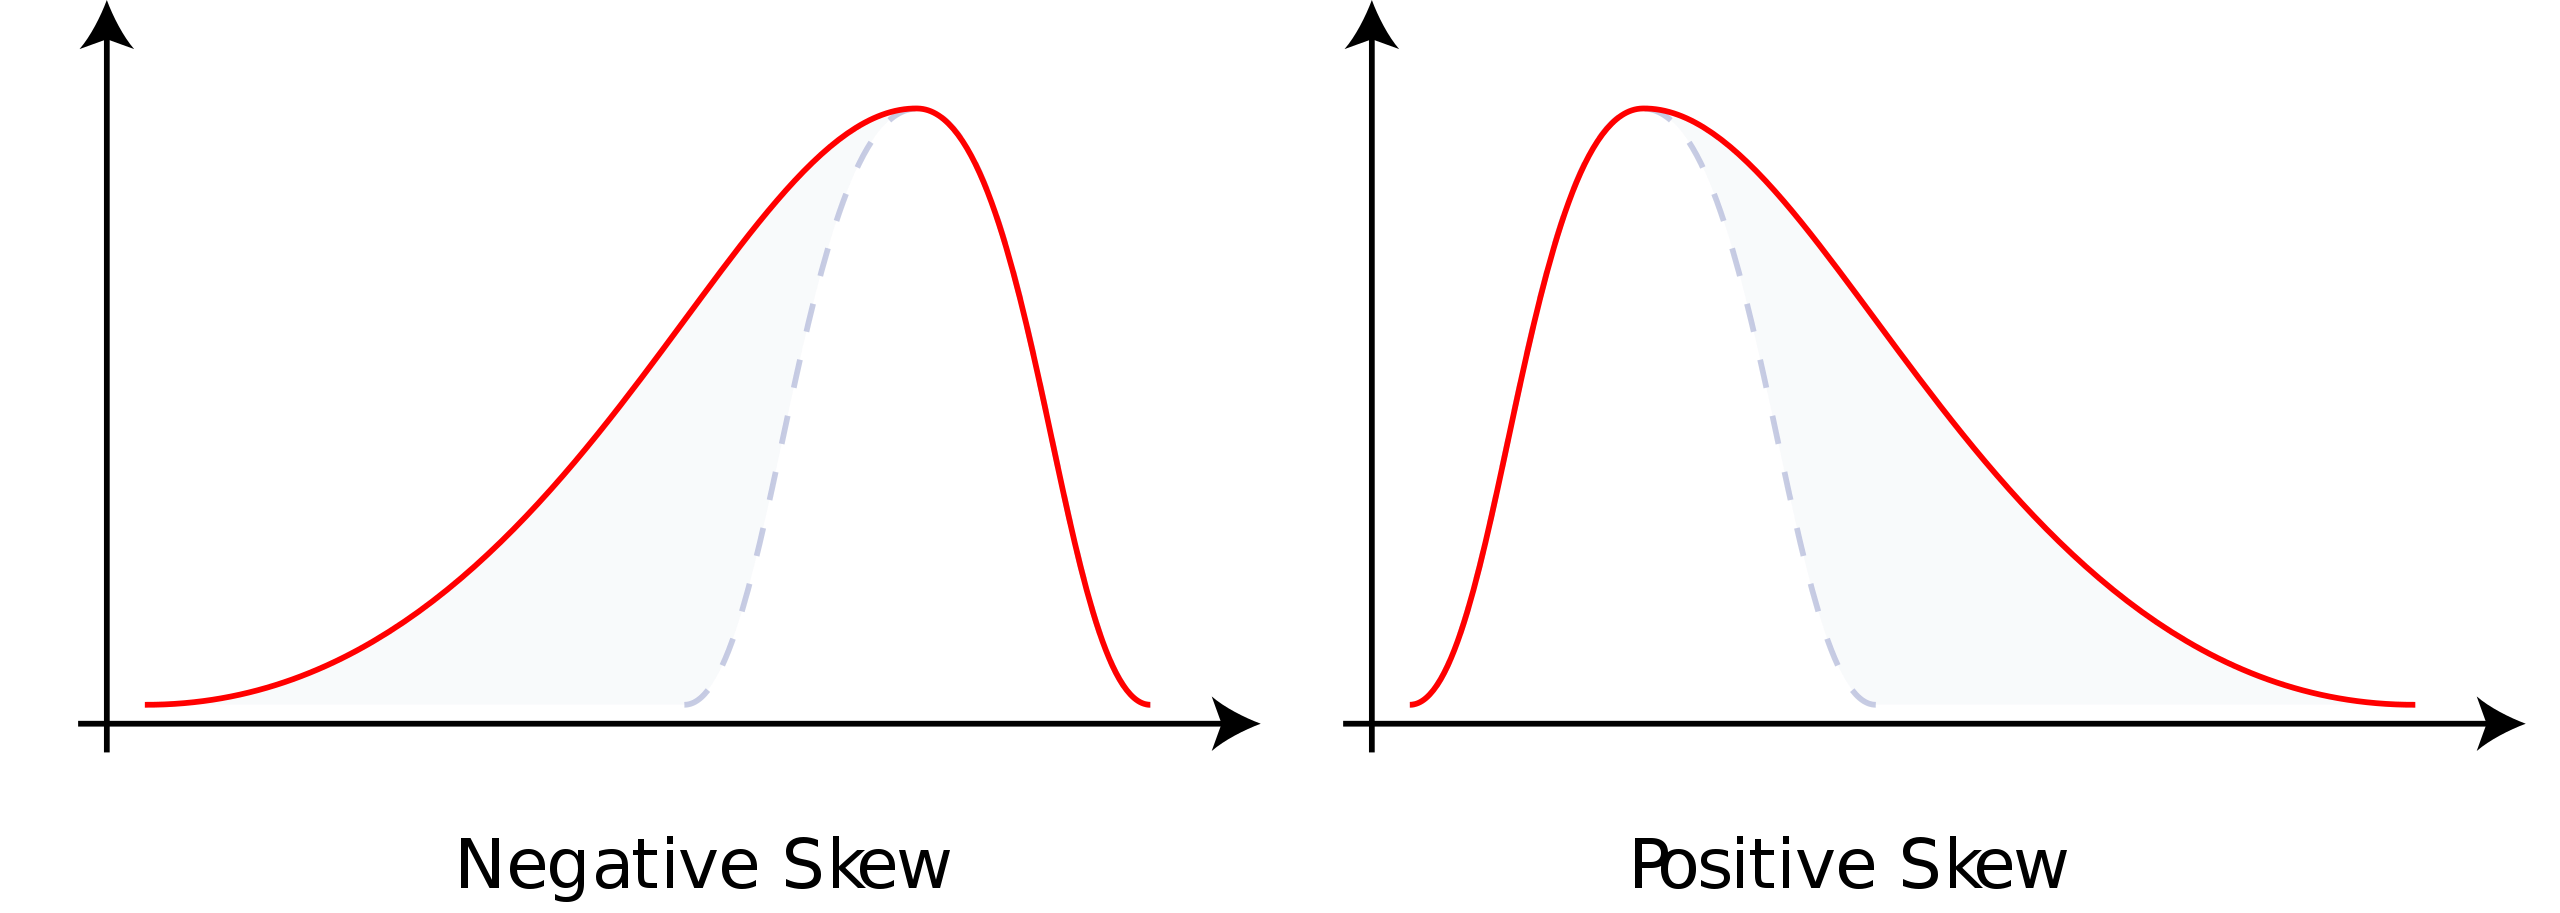

In Pandas use the `skew()` method on a Dataframe, column or Series.

In [20]:
red.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

## Visual Data Analysis

Looking at the numbers gives a first impression of the data. It is always best combined with a visual analysis.

While many visualizations can be created directly from Pandas or using the matplotlib library there is a package that is made for creating statistical visualizations: Seaborn https://seaborn.pydata.org/

In [27]:
import seaborn as sns

### Univariate Visual Data Analysis

#### Histogram



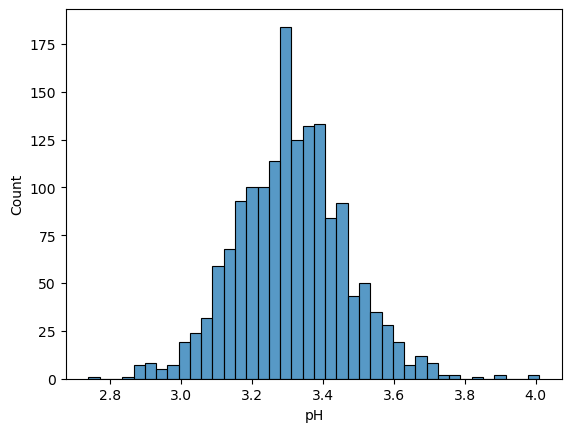

In [46]:
plot = sns.histplot(data=red,
                    x="pH")

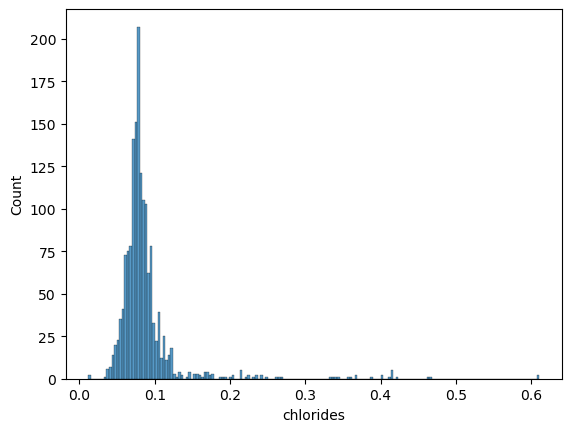

In [45]:
plot = sns.histplot(data=red,
                    x="chlorides")

For heavily skewed data it is often better to use a logarithmic scale.

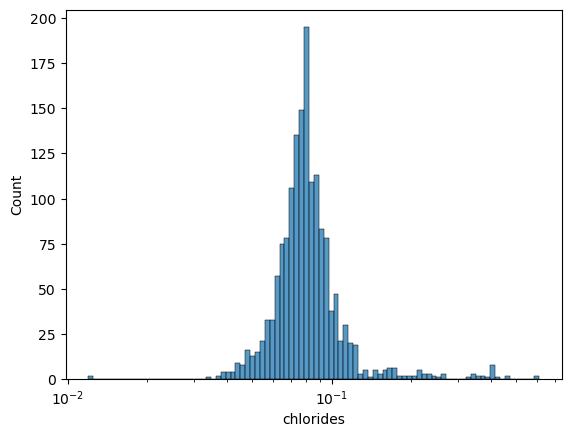

In [43]:
plot = sns.histplot(data=red,
                    x="chlorides",
                    log_scale=True)

You can also adjust the bins.

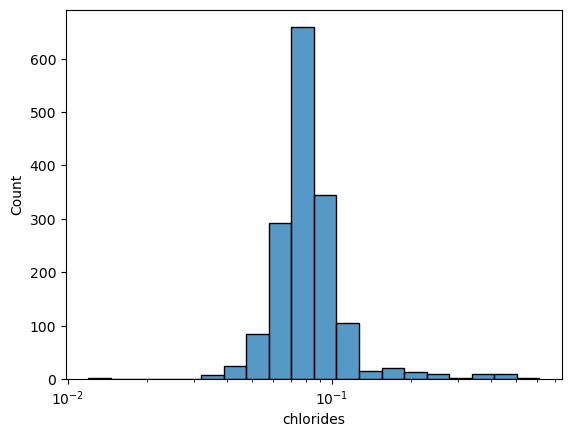

In [47]:
plot = sns.histplot(data=red,
                    x="chlorides",
                    log_scale=True,
                    bins=20)

Or plot multiple histograms together based on a categorical datum.

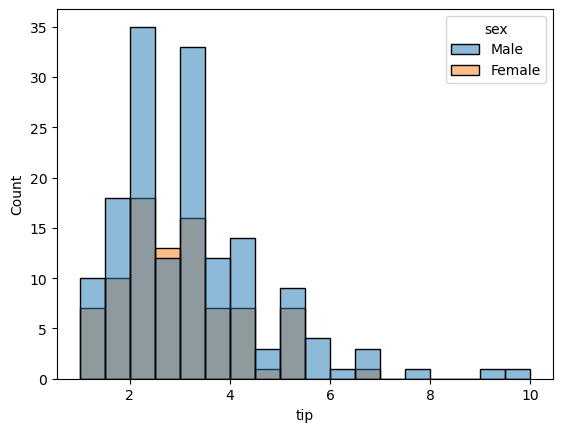

In [41]:
plot = sns.histplot(data=tips,
                    x='tip',
                    hue='sex')

#### Kerneldensity

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

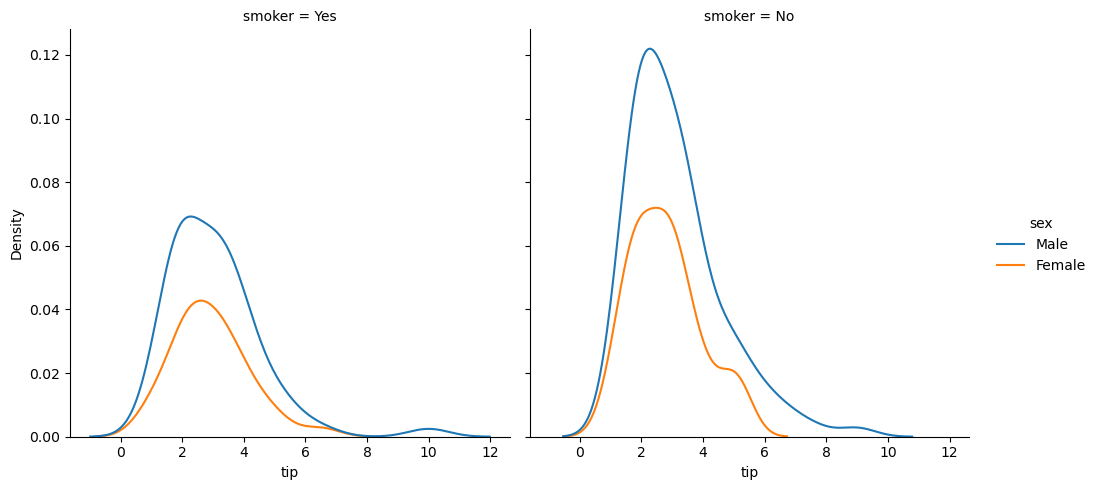

In [48]:
plot = sns.displot(data=tips,
                   x="tip",
                   hue="sex",
                   col="smoker",
                   kind="kde")

#### Boxplot

Another good way to look at the data is with boxplots.

They show:

- Minimum
- First quartile
- Median
- Third quartile
- Maximum

The central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).

Outliers are either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile and are shown separately.

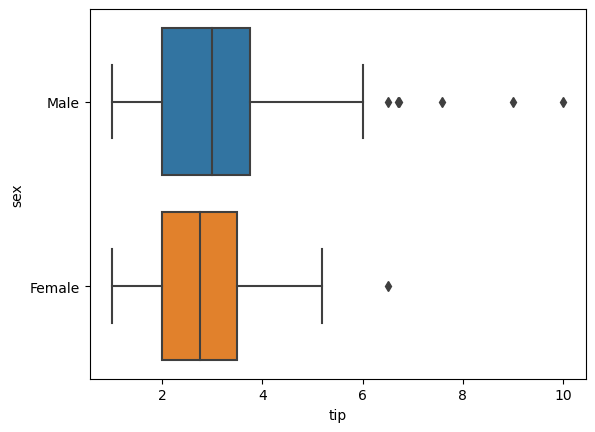

In [50]:
plot = sns.boxplot(data=tips,
                   x='tip',
                   y='sex')

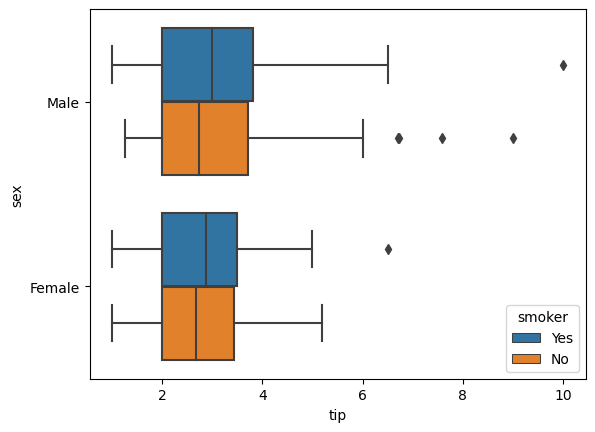

In [52]:
plot = sns.boxplot(data=tips,
                   x='tip',
                   y='sex',
                   hue='smoker')

### Multivariate Visual Data Analysis

While looking at each column individually gives some insight into the dataset it is also needed to look at multiple columns together.

#### Jointplot

The jointplot shows a combination of a pointplot for two columns with the kde plots and is a really good tool to see interactions.

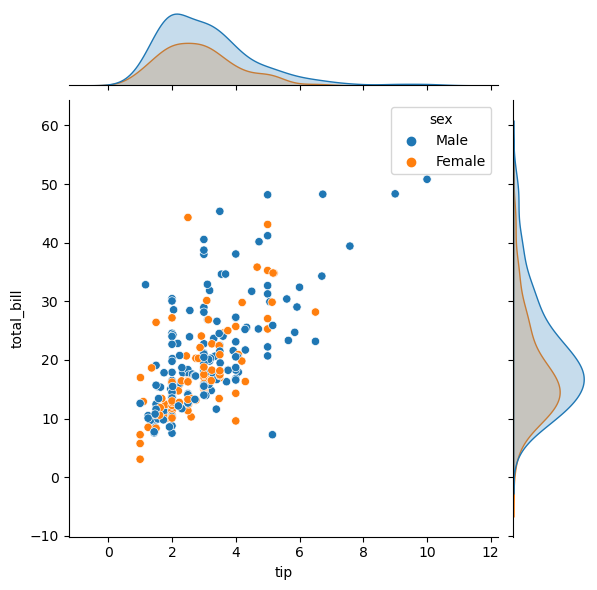

In [54]:
plot = sns.jointplot(data=tips,
                     x="tip",
                     y="total_bill",
                     hue="sex")

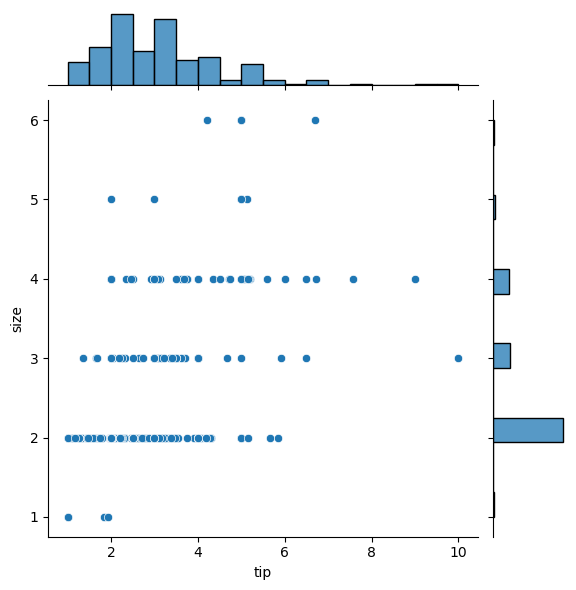

In [59]:
plot = sns.jointplot(data=tips,
                     x="tip",
                     y="size")

#### Pairplot

It shows pairwise relationships in a dataset.

Please keep in mind that for large datasets this plot might take a while to be plotted.

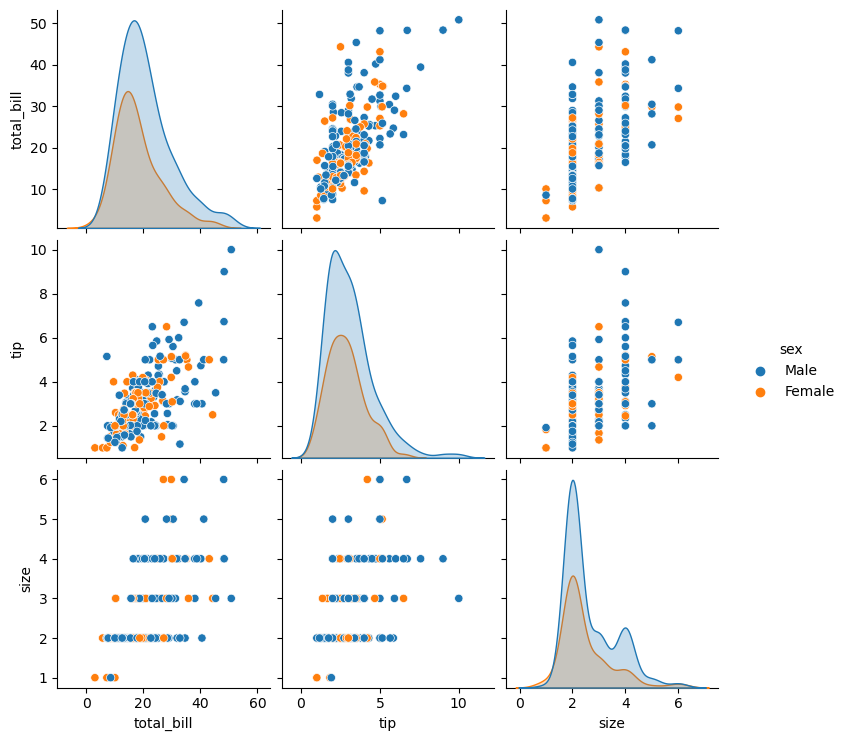

In [62]:
plot = sns.pairplot(data=tips,
                   hue='sex')

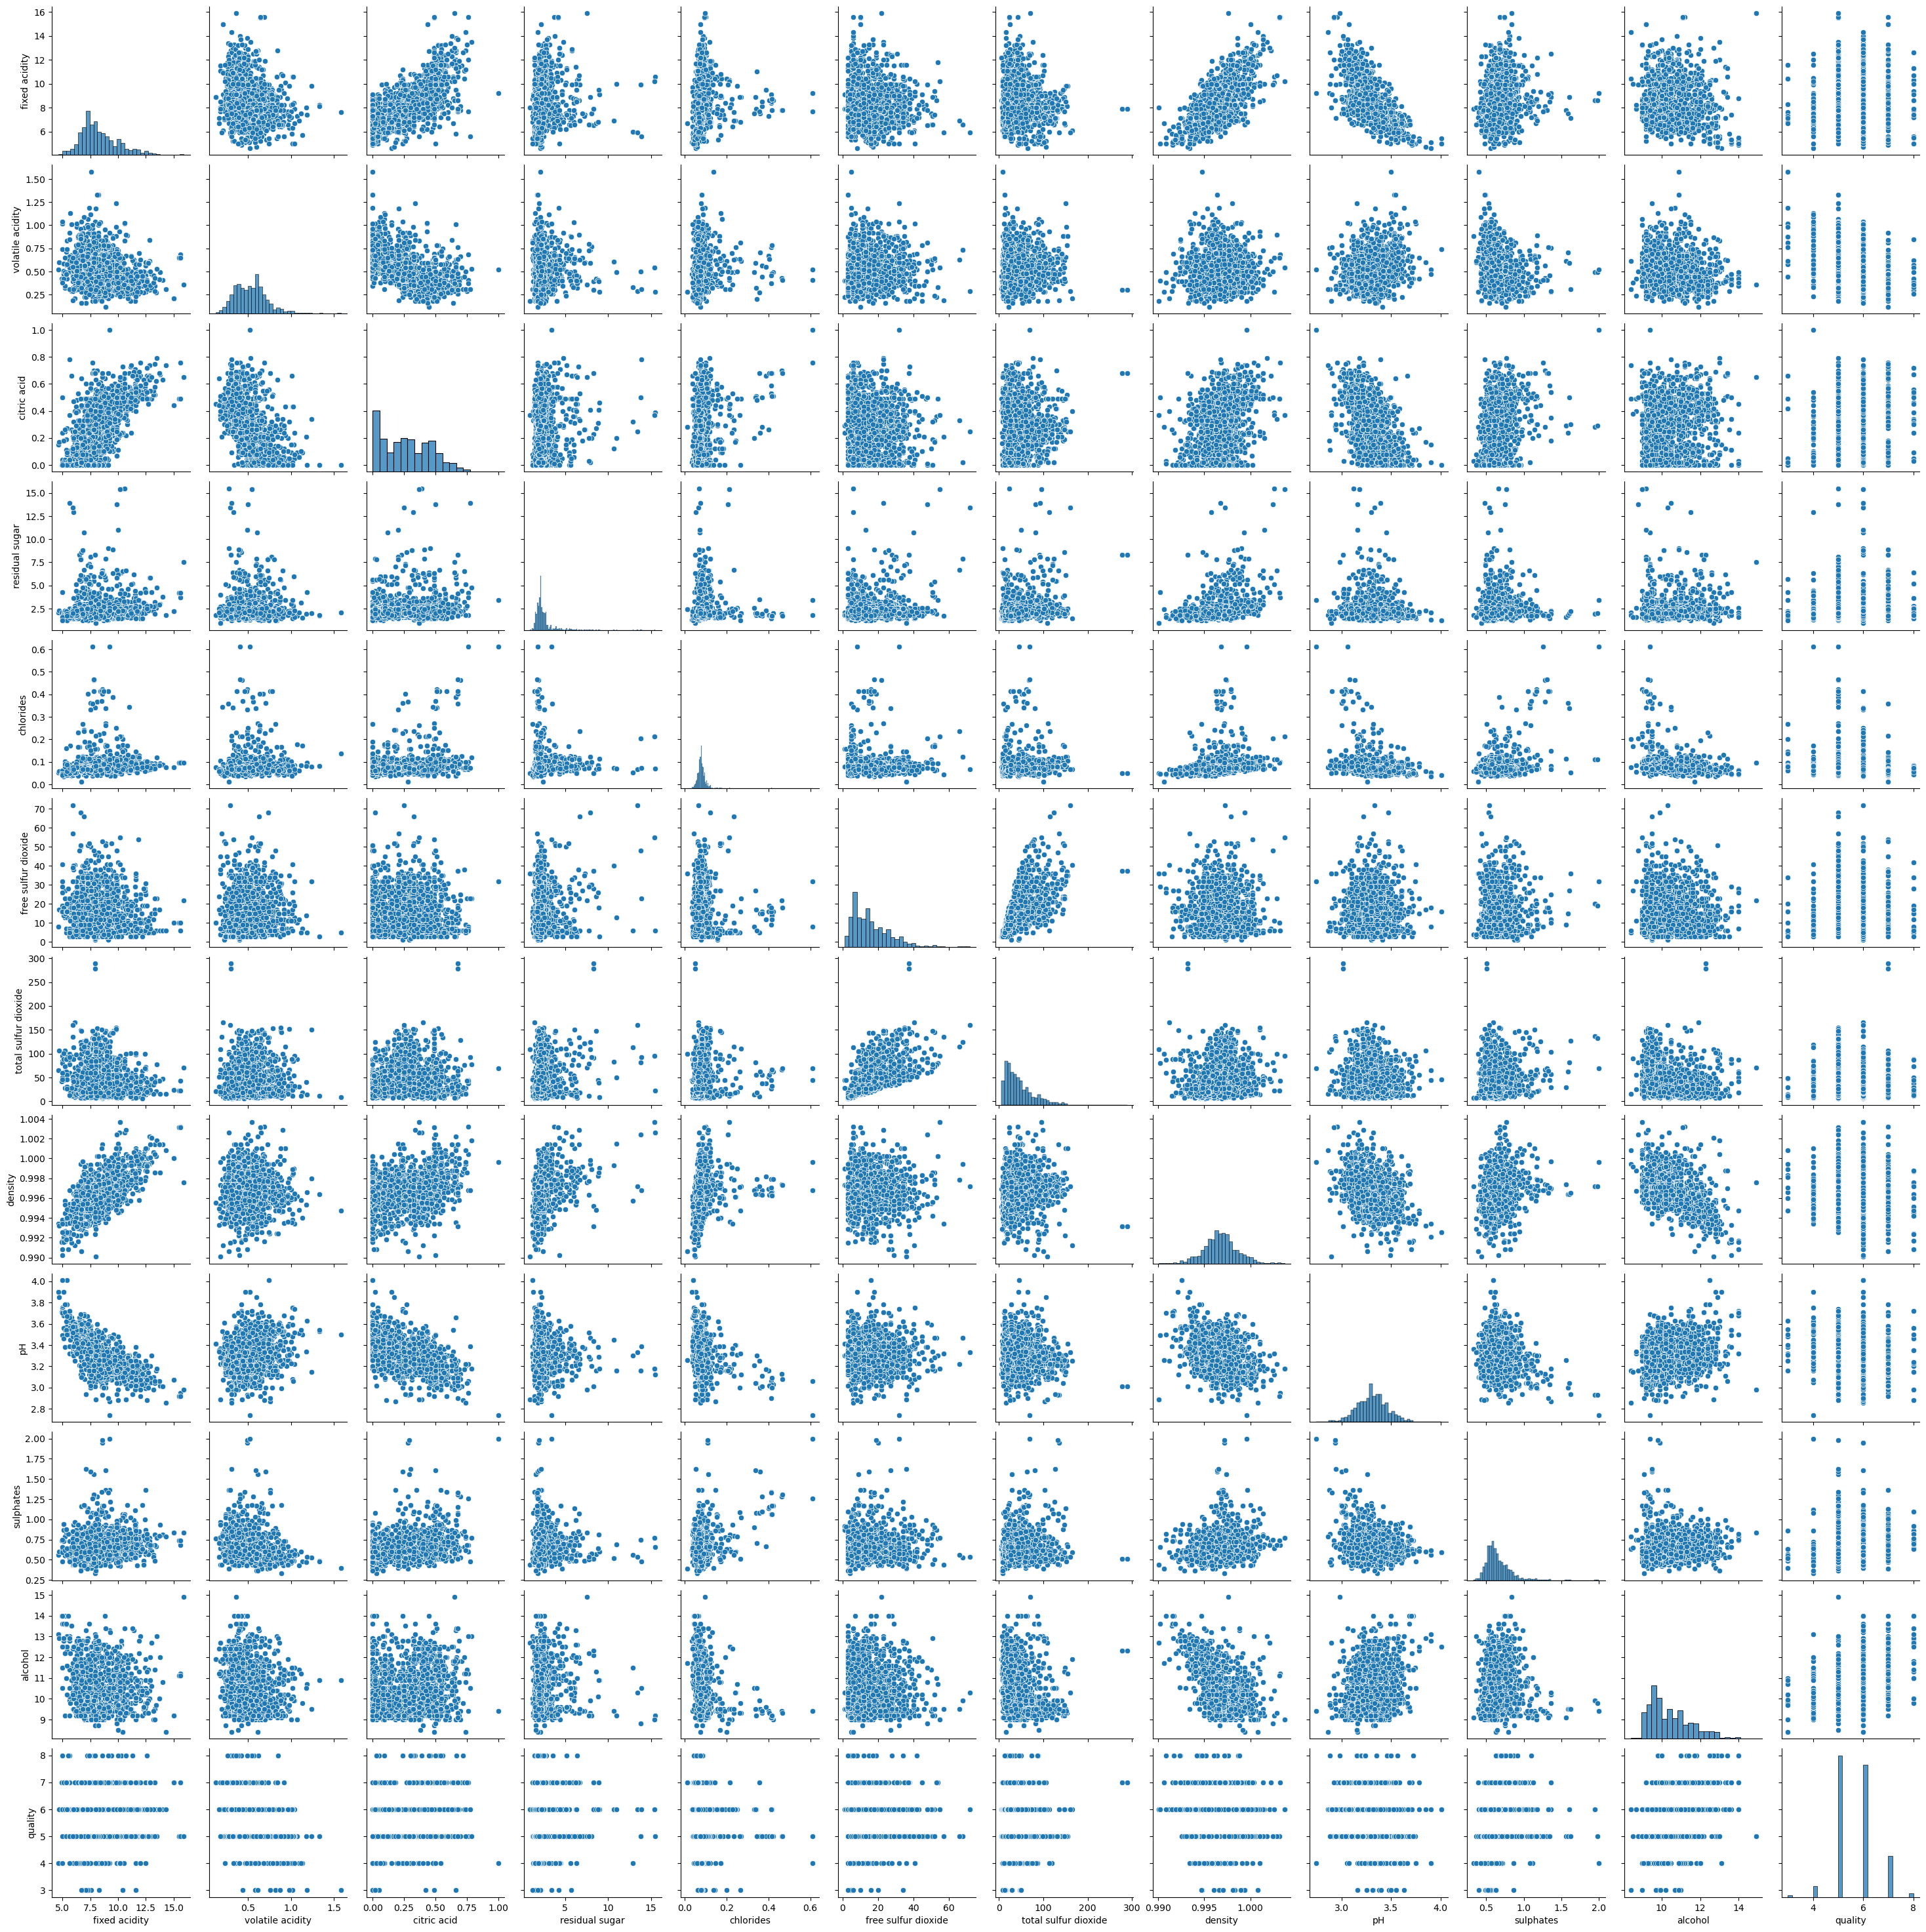

In [61]:
plot = sns.pairplot(data=red)

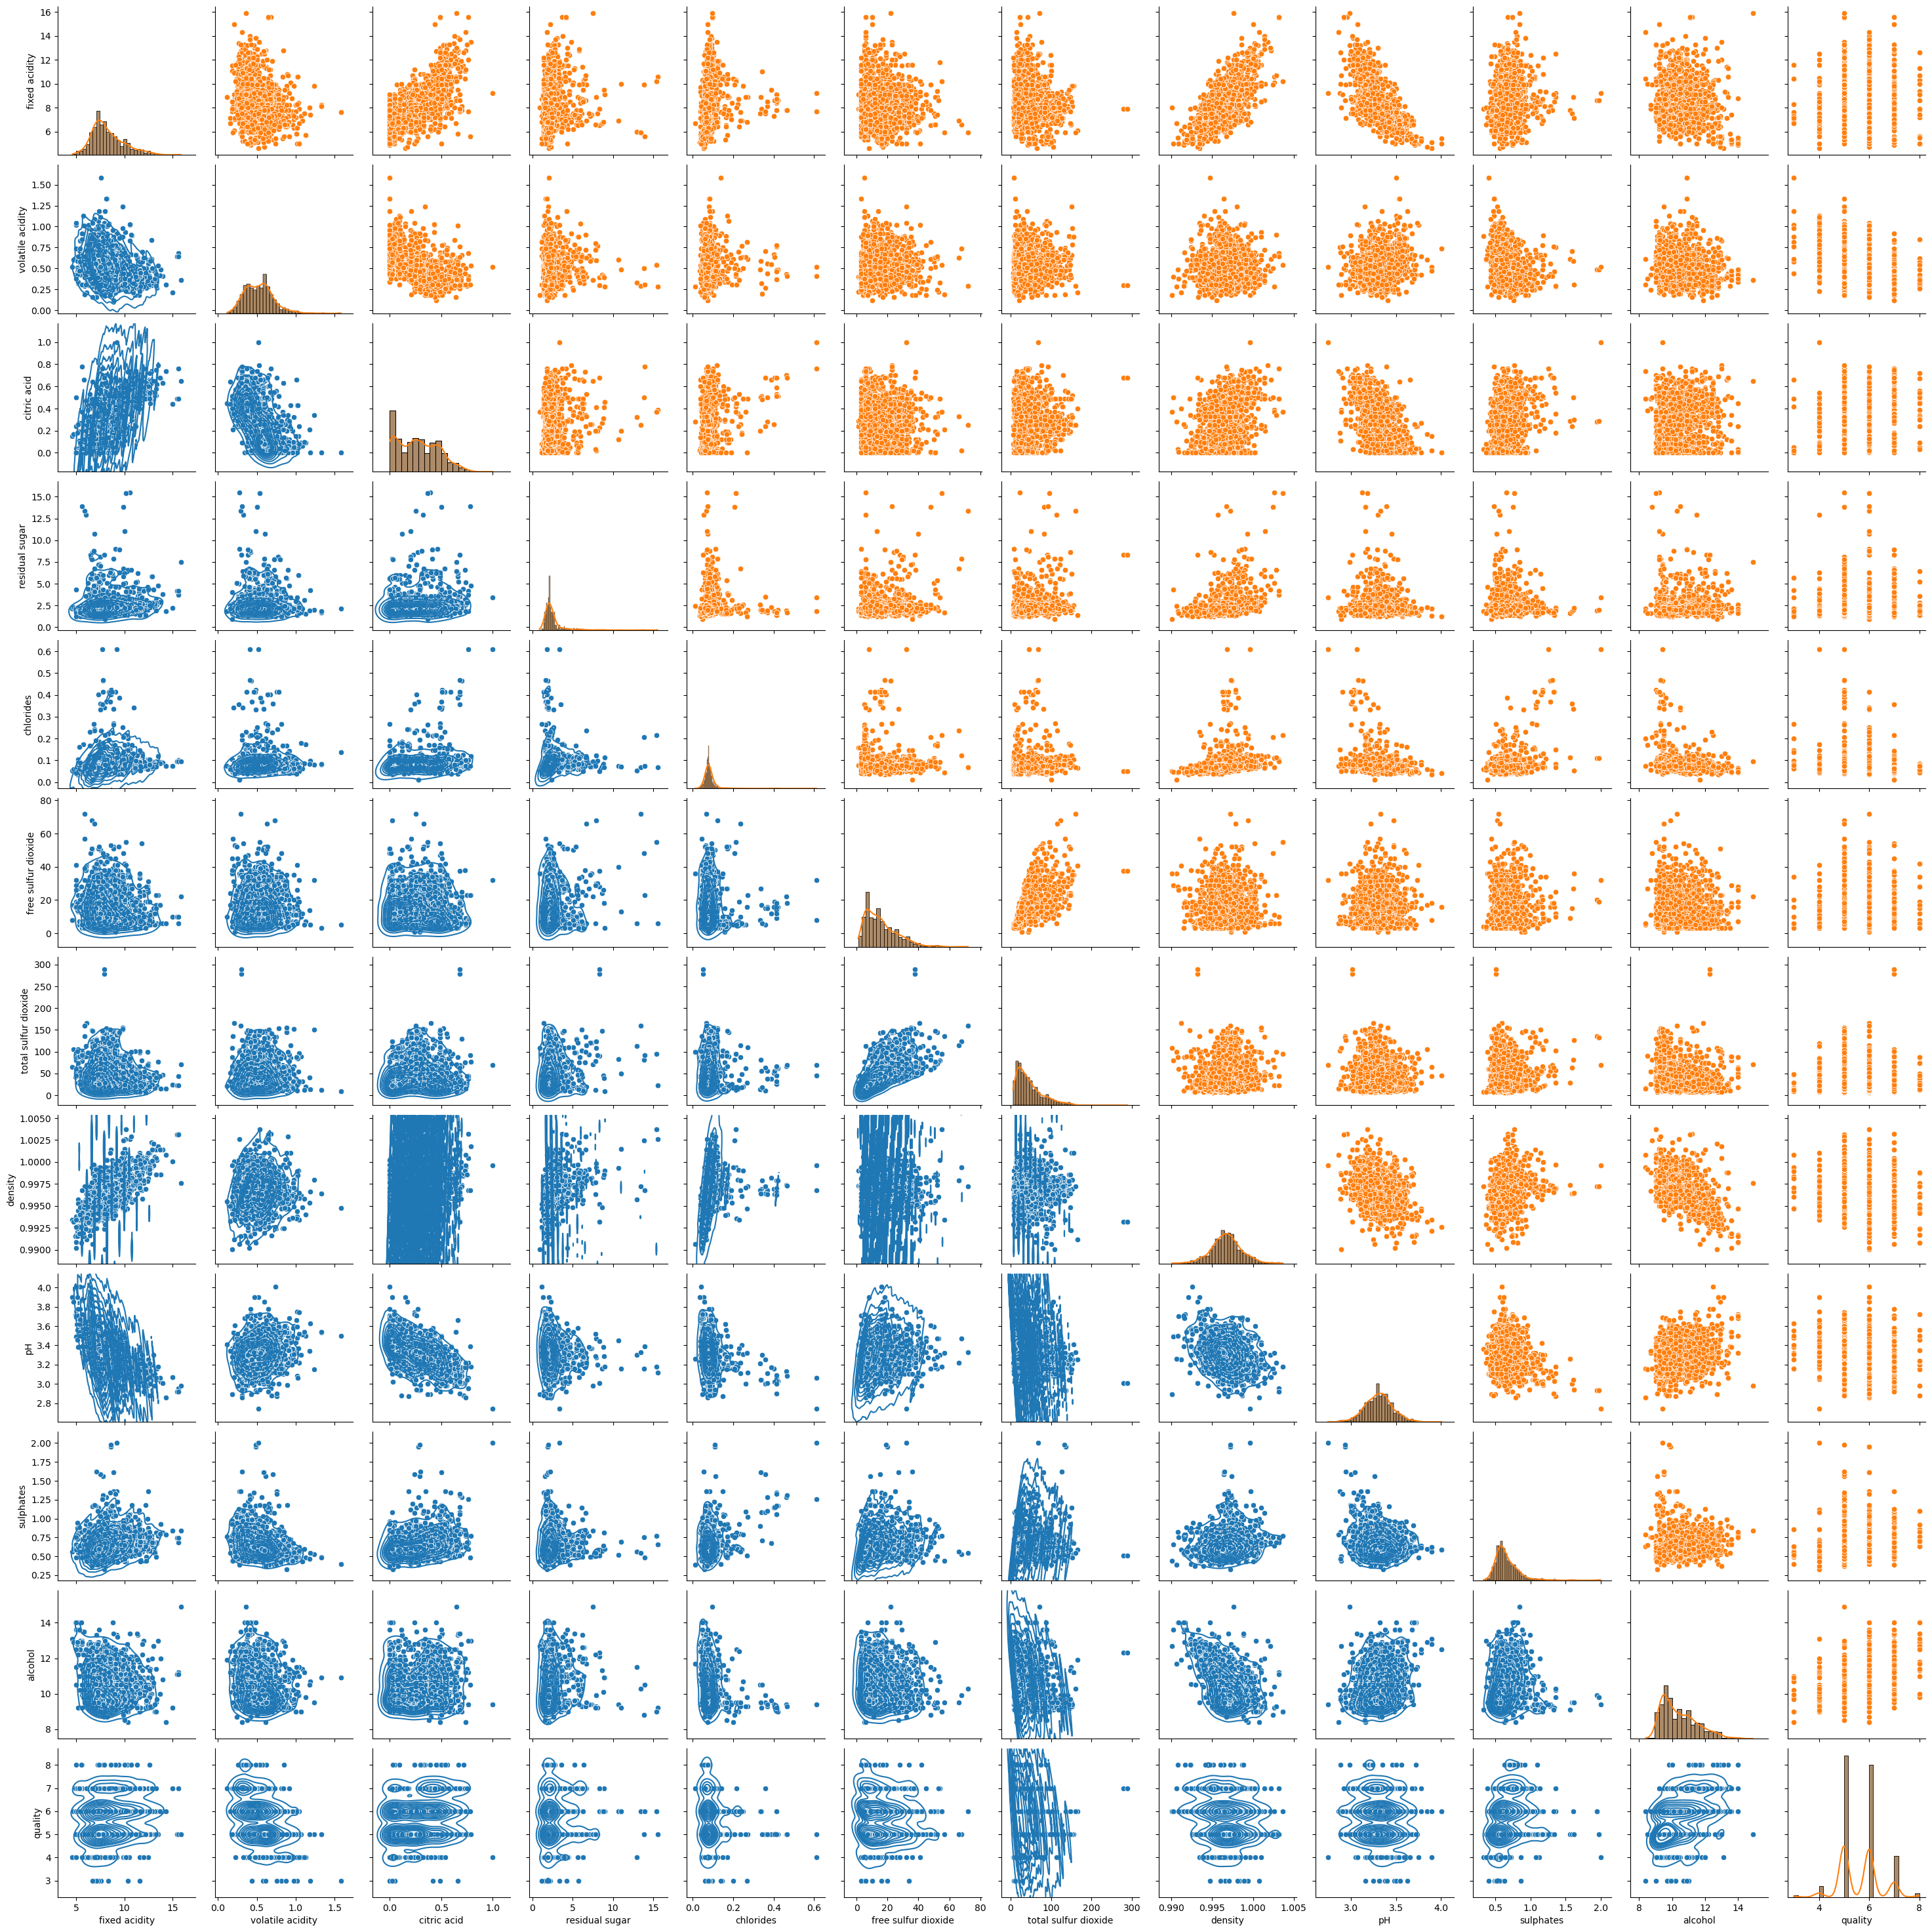

In [64]:
# set the parts
plot = sns.pairplot(data=red)
# the plots above the diagonal are scatterplots
plot.map_upper(sns.scatterplot)
# The plots under the dioganal are KDE plots
plot.map_lower(sns.kdeplot)
# The plots on the diogonal are histograms showing the KDE
plot.map_diag(sns.histplot, kde=True)

# Correlation

Correlation is a statistical measure of dependence between two variables. It shows if there is a statistical relationship between them. It is very important to note that correlation doesn't indicate causation. The amount of icecream sold in Boston is correlated to number of people rescued by the coast guard from swimming accidents in the ocean. But neither is causing the other.

There are many different relationships two variables might have. The simplest one is a linear relationship between the two variables.

This correlation is measured by the Pearson correlation coefficient. The coefficient is a number between -1 and 1 with:

- -1 indicating a perfect inverse correlation - when one variable goes up the other one goes down
- 0 indicating no correlation
- 1 indicating a perfect direct correlation - when one variable goes up the other does as well

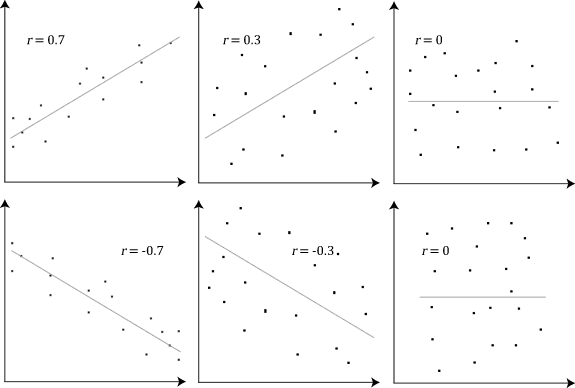

The correlation reflects the noisiness and direction of a linear relationship (top row), but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom).

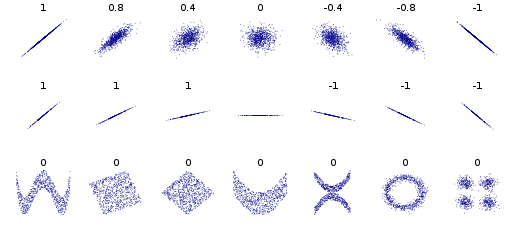

Also keep in mind that looking at descriptive statistics alone can give a very wrong picture and visual inspection is always needed.

The following graphic is known as Anscombe's quartet and shows four sets of data with the same correlation of 0.816 but very different distributions.

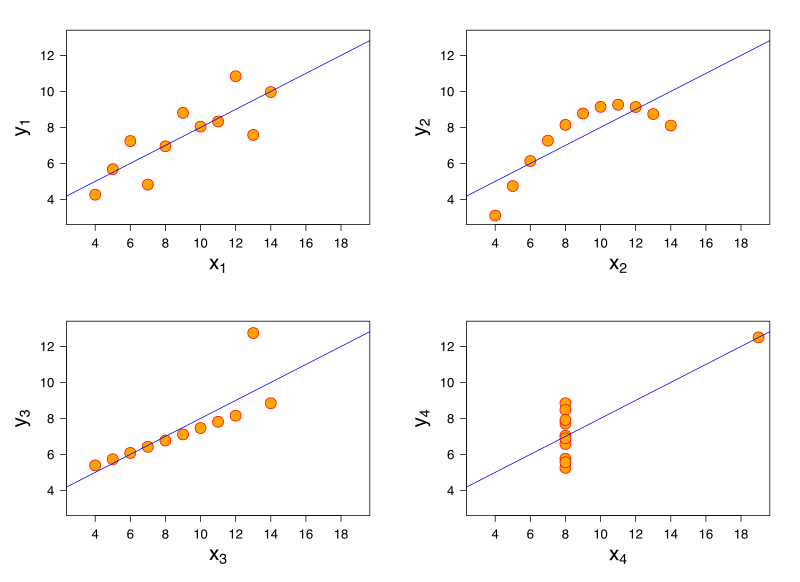

## Calculation

The Pearson correlation coefficient can be calculated using the `corr()` method in Pandas.

In [66]:
correlations = tips.corr()
correlations

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

In [68]:
correlations = red.corr()
correlations

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

## Heatmap

As correlation matrices like above often are a big bunch of numbers and make it hard to see the important ones they are often displayed in a heatmap.


<AxesSubplot: >

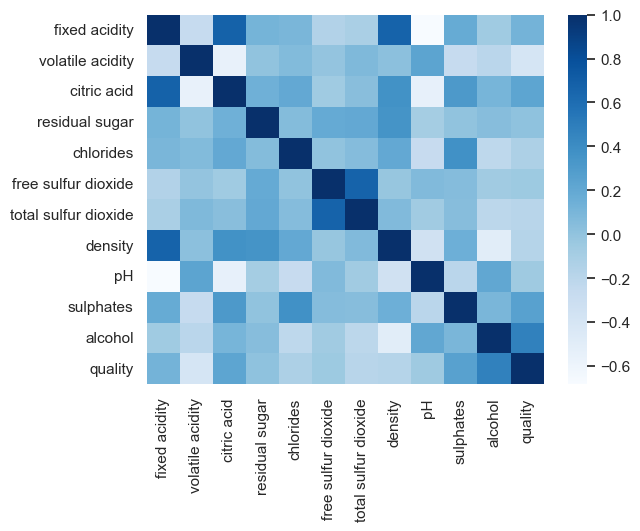

In [206]:
sns.heatmap(red.corr(),
            cmap='Blues',
            annot=False)

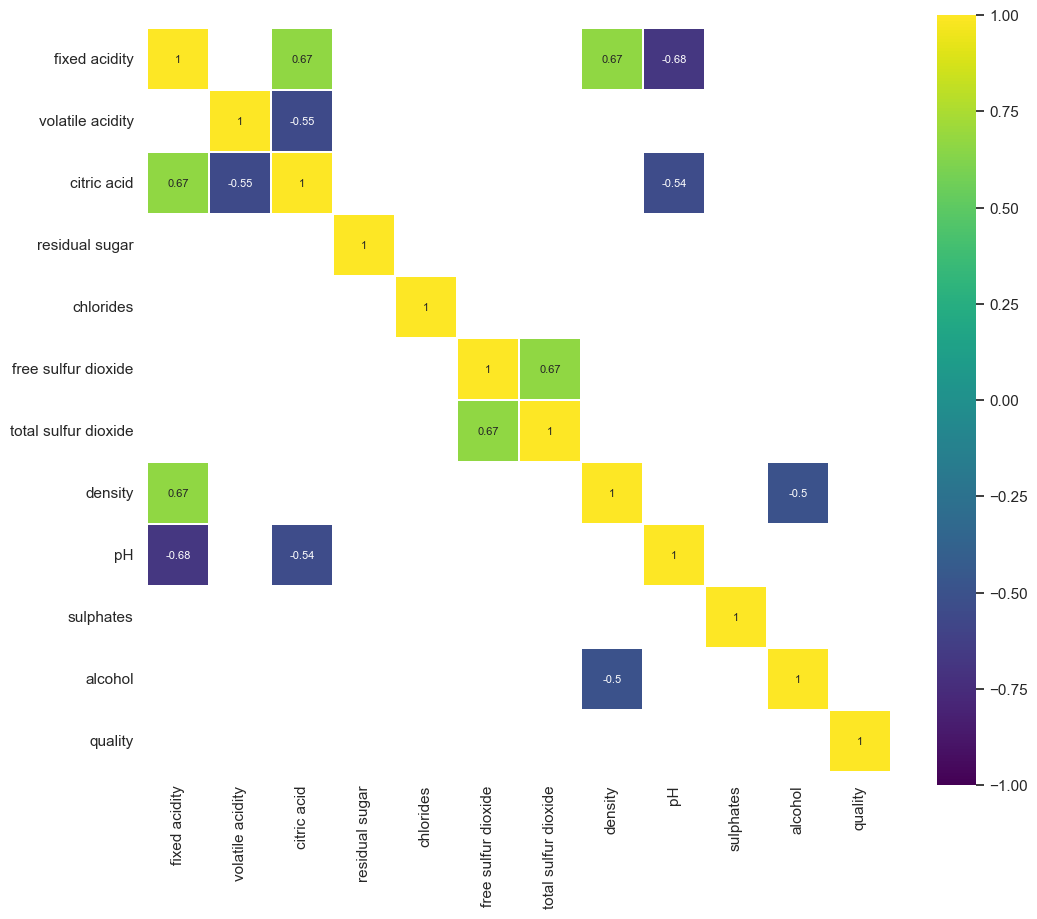

In [74]:
import matplotlib.pyplot as plt

corr = red.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis',
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

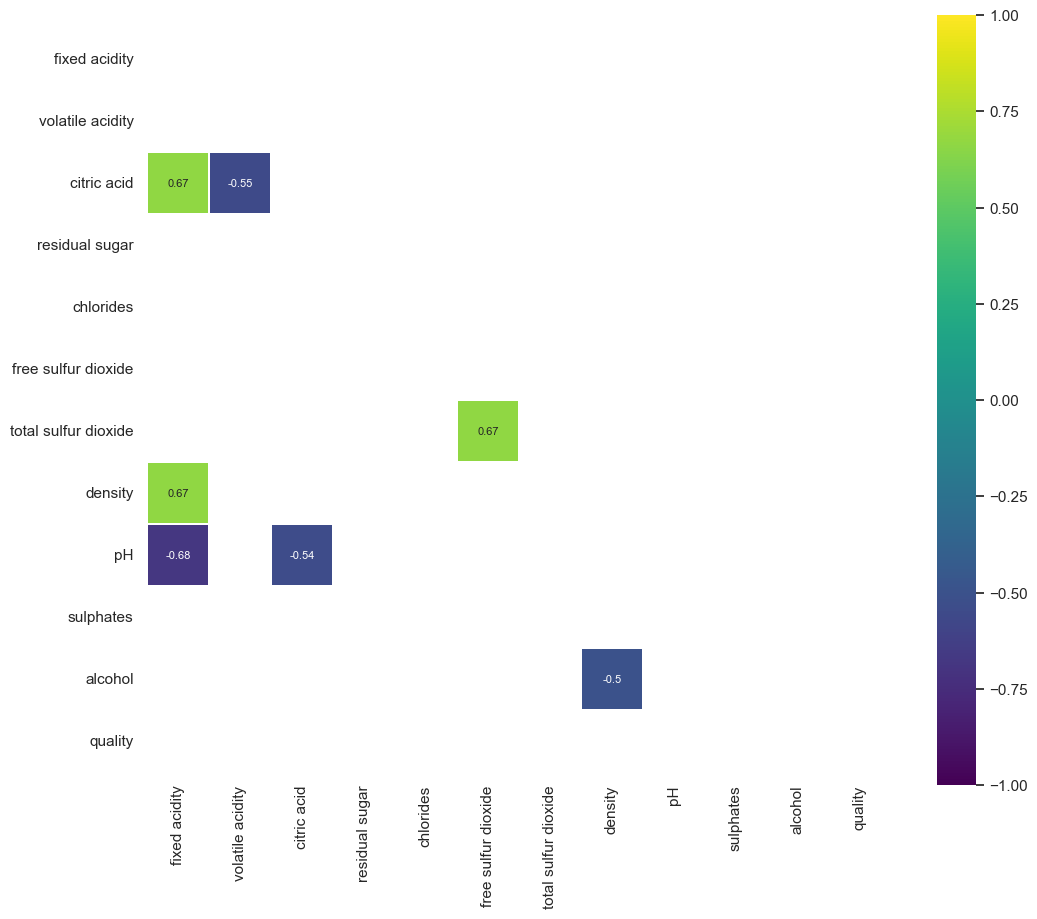

In [75]:
import matplotlib.pyplot as plt

corr = red.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

## Further analyse the strongly correlated features

As mentioned above a visual analysis of the strongly correlated features is needed.

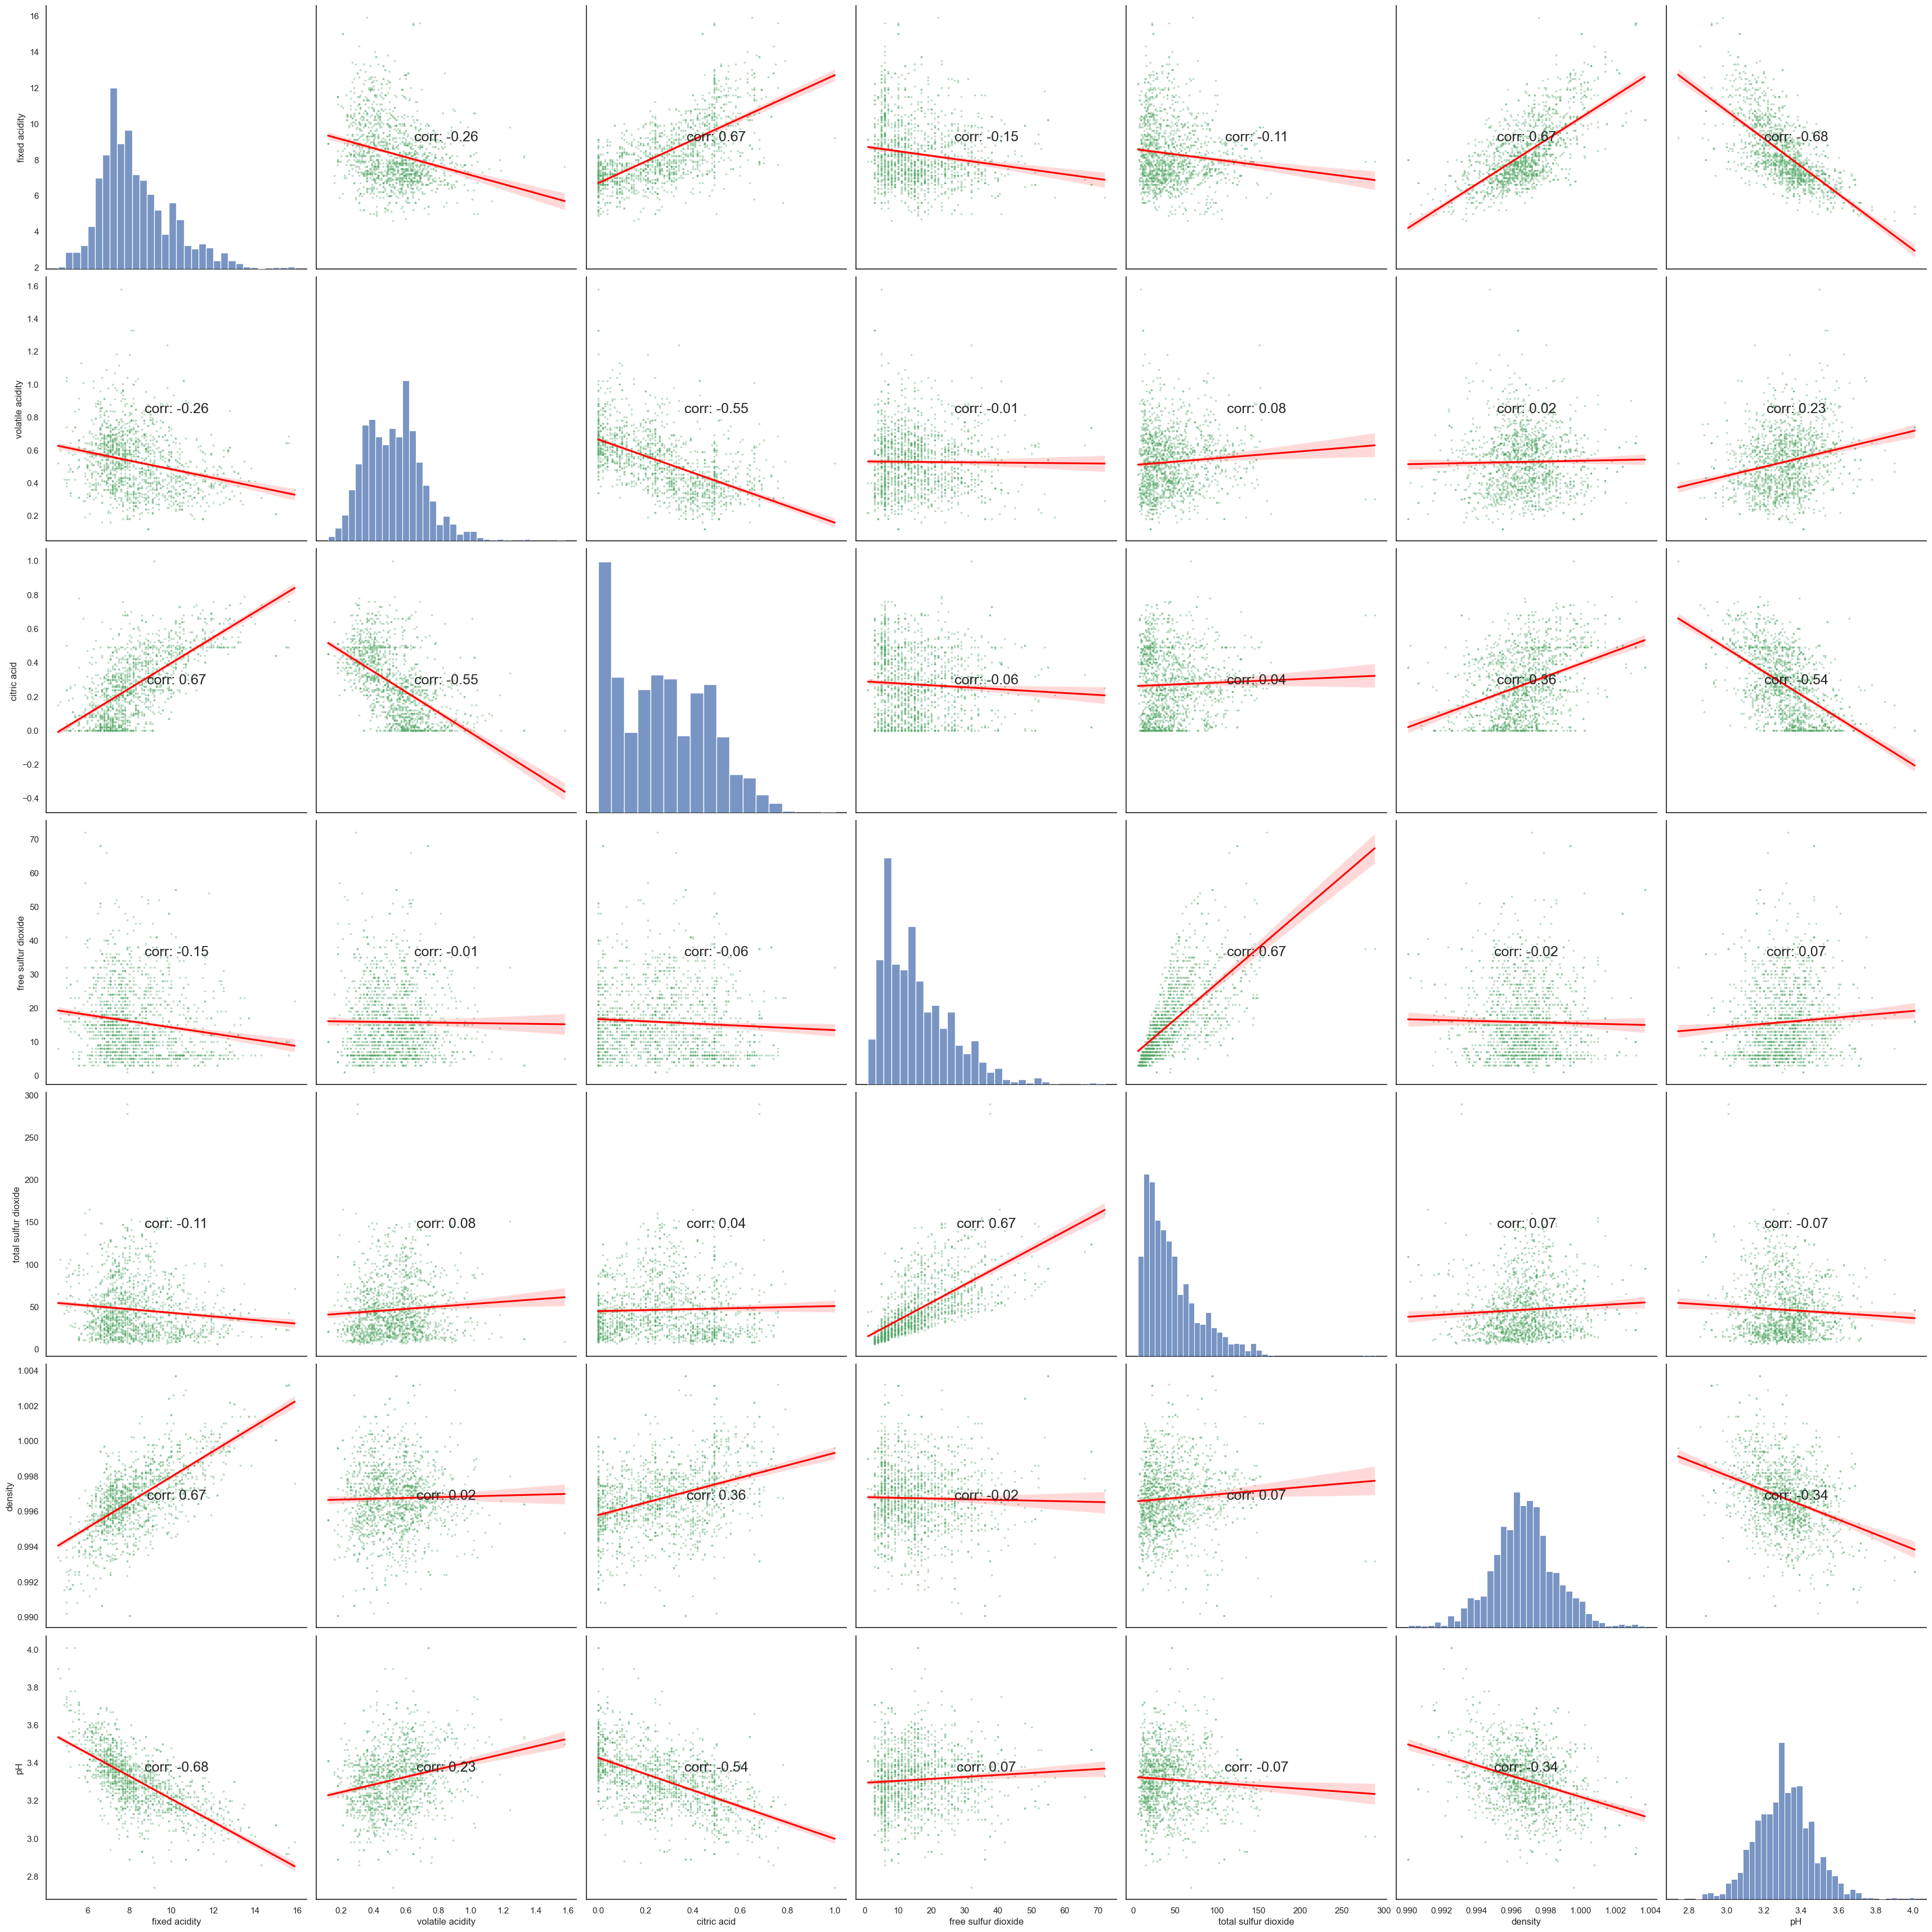

In [204]:
correlations = red.corr()

# Select only the columns with a high correlation
corr_threshold = 0.5

corr_features = red.corr()[((correlations >= corr_threshold) | (correlations <= -corr_threshold)) & (correlations != 1.0)]
variables = corr_features.loc[corr_features.sum() != 0.0, corr_features.sum() != 0.0].columns

# plot the regression plots for those
plot = sns.pairplot(data=red[variables],
                    kind='reg',
                    plot_kws=dict(scatter_kws = {'color': 'g',
                                                 'alpha': 0.3,
                                                 's': 3},
                                  line_kws = {'color': 'red'}),
                    height=5)

# Annotate with the correlation values
for i in range(len(plot.axes)):
    for j in range(len(plot.axes[i])):
        # For the diogonal there are not always labels - skip those
        if i!=j:
            y_label = plot.axes[i][j].get_ylabel()
            x_label = plot.axes[i][j].get_xlabel()
            plot.axes[i][j].text(0.5,
                                 0.5,
                                 f"corr: {correlations.loc[x_label, y_label]:.2f}",
                                 size=18,
                                 ha='center',
                                 va='center',
                                 # use position relative to axes
                                 transform=plot.axes[i][j].transAxes)

# Anomaly detection and treatment

## Outliers

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are defined as outliers.

While sometimes these outliers are very important for the analysis for modelling purposes they should usually be removed. For this there are multiple approaches:

- Trimming: It excludes the outlier values from the dataset. The main advantage is its fastest nature. Datasets with many outliers loose many datapoints.

- Capping: In this technique, outlier data is capped and set to a limit. For Example, if you’re working on the income feature, you might find that people above a certain income level behave in the same way as those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

- Treat outliers as a missing value: By assuming outliers as the missing observations, treat them accordingly i.e, same as those of missing values.

## Missing values

Missing or NaN values in a dataset can cause problems. There are a couple common ways to deal with them:

- Delete the observations: If there is a large number of observations in the dataset, where all the classes to be predicted are sufficiently represented try deleting the missing value observations, which would not bring significant change.

- Replace missing values with the most frequent value: You can always impute them based on Mode in the case of categorical variables, just make sure you don’t have highly skewed class distributions. If there is a high number of missing values in a feature this leads to pseudo-information.

- Develop a model to predict missing values: One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

Always pay attention on the assumptions you are making by treating missing values a certain way.